In [1]:
import random

REWARD_CLICK = 1
REWARD_NO_CLICK = 0


class WebsiteEnvironmentSimple:
    def __init__(self, proba):
        self.proba = proba

    def do(self, action):
        reward = REWARD_CLICK if random.random() < self.proba[action] else REWARD_NO_CLICK
        return reward

In [2]:
from abc import ABC, abstractmethod


class BanditBase(ABC):
    def __init__(self, K, env):
        self.arms = list(range(K))
        self.env = env
        self.history = []

    @abstractmethod
    def get_action(self):
        raise NotImplementedError()

    def update(self, arm, reward):
        self.history.append([arm, reward])
        self._update(arm, reward)

    @abstractmethod
    def _update(self, arm, reward):
        raise NotImplementedError()


In [3]:
import random
import numpy as np

class EpsilonGreedyBandit(BanditBase):
    def __init__(self, ϵ, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.ϵ = ϵ
        self.rewards = {arm: [] for arm in self.arms}
    
    def get_action(self):
        if random.random() < self.ϵ:
            action = random.choice(self.arms)
        else:
            action = np.argmax([np.mean(arm_rewards) for arm_rewards in self.rewards.values()])
        
        return action
    
    def _update(self, arm, reward):
        self.rewards[arm].append(reward)

## 2 versions

In [4]:
conversion_rates = [0.15, 0.13]
env = WebsiteEnvironmentSimple(conversion_rates)

In [5]:
bandit = EpsilonGreedyBandit(ϵ=0.3, K=2, env=env)

In [6]:
for _ in range(10_000):
    action = bandit.get_action()
    reward = env.do(action)
    bandit.update(action, reward)

C:\Users\rutger\miniconda3\envs\pomp\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\rutger\miniconda3\envs\pomp\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
np.mean(bandit.rewards[0])

0.1429032778943969

In [8]:
np.mean(bandit.rewards[1])

0.1276595744680851

In [9]:
import pandas as pd

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\rutger\AppData\Local\Temp\ipykernel_8316\2194647022.py:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(np.cumsum(bandit.rewards[0]) / np.linspace(0, n, n))


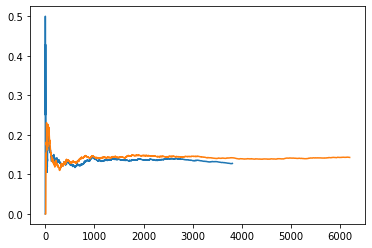

In [11]:
n = len(bandit.rewards[1])
plt.plot(np.cumsum(bandit.rewards[1]) / np.linspace(1, n, n))
n = len(bandit.rewards[0])
plt.plot(np.cumsum(bandit.rewards[0]) / np.linspace(0, n, n))

## 8 versions

In [18]:
conversion_rates = [0.15, 0.13, 0.12, 0.16, 0.17, 0.13, 0.14, 0.18]
env = WebsiteEnvironmentSimple(conversion_rates)

In [19]:
bandit = EpsilonGreedyBandit(ϵ=0.15, K=8, env=env)

In [20]:
for _ in range(100_000):
    action = bandit.get_action()
    reward = env.do(action)
    bandit.update(action, reward)

In [21]:
for arm, rewards in bandit.rewards.items():
    print(arm + 1, np.mean(rewards))

1 0.15192218619731357
2 0.13333333333333333
3 0.1266774020397209
4 0.15843023255813954
5 0.16931136201810598
6 0.12446146481570129
7 0.14358647096362476
8 0.16168941979522183


Finds 0.17 as optimal